In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
df=pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
df['LIMIT_BAL'], df['default payment next month']

(0         20000
 1        120000
 2         90000
 3         50000
 4         50000
           ...  
 26659    220000
 26660    150000
 26661     30000
 26662     80000
 26663     50000
 Name: LIMIT_BAL, Length: 26664, dtype: int64,
 0        1
 1        1
 2        0
 3        0
 4        0
         ..
 26659    0
 26660    0
 26661    1
 26662    1
 26663    1
 Name: default payment next month, Length: 26664, dtype: int64)

In [5]:
x=df['LIMIT_BAL'].values.reshape(-1,1)
y=df['default payment next month']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
y_test

5904     0
2298     1
15477    0
13716    0
18849    1
        ..
2008     0
13235    0
13441    1
11154    0
10700    0
Name: default payment next month, Length: 5333, dtype: int64

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [8]:
model=LogisticRegression()

In [9]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [10]:
pred = model.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
predprob = model.predict_proba(x_test)
predprob

array([[0.92854628, 0.07145372],
       [0.8901378 , 0.1098622 ],
       [0.58356938, 0.41643062],
       ...,
       [0.77114653, 0.22885347],
       [0.79409265, 0.20590735],
       [0.91905625, 0.08094375]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [12]:
roc_auc_score(y_test,predprob[:,1])

0.6196226715625339

_________________________________________________________________________
**Now, plot the ROC curve.**

Some Important Terms For Plotting ROC Curve :

fpr is False Positive Rate.

npr is Negative Positive Rate.

tpr is True Positive Rate.

thres is Threshold Value.

Text(0, 0.5, 'TPR - True Positive Rate')

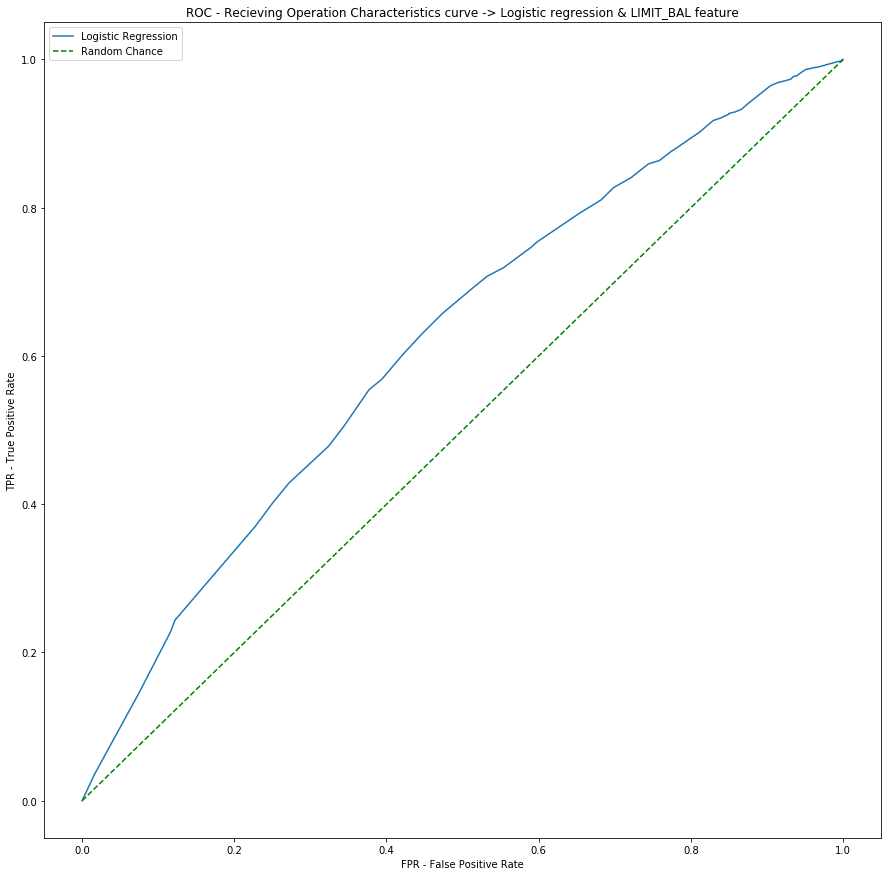

In [13]:
fpr,tpr,thres=roc_curve(y_test,predprob[:,1])

plt.figure(figsize=(15,15))
plt.plot(fpr,tpr)
plt.plot((0,1),(0,1),"g--")
plt.legend(['Logistic Regression','Random Chance'])
plt.title('ROC - Recieving Operation Characteristics curve -> Logistic regression & LIMIT_BAL feature')
plt.xlabel('FPR - False Positive Rate')
plt.ylabel('TPR - True Positive Rate')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [14]:
from sklearn.metrics import precision_recall_curve,precision_score,precision_recall_fscore_support, auc

In [15]:
precision,recall,thresh1=precision_recall_curve(y_test,predprob[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precision and recall Curve - >  logistic regression & LIMIT_BAL')

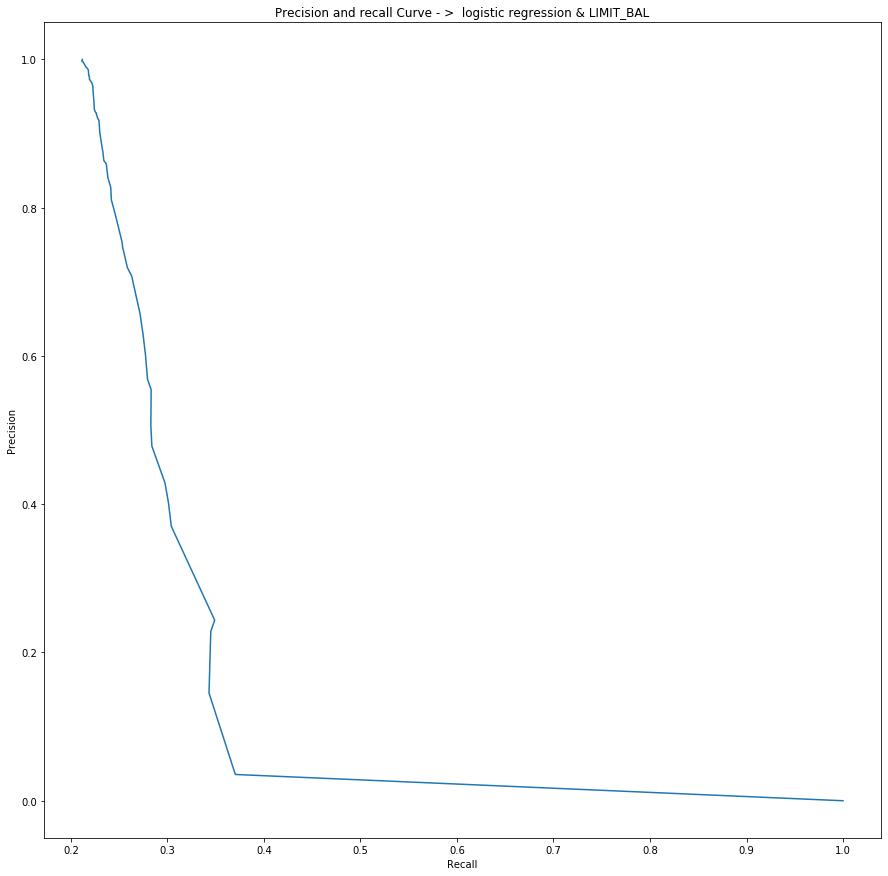

In [16]:
plt.figure(figsize=(15,15))
plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall Curve - >  logistic regression & LIMIT_BAL')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [17]:
auc(recall,precision)

0.30350381273417226

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [18]:
train_pred=model.predict(x_train)

In [19]:
train_predprob=model.predict_proba(x_train)
train_predprob

array([[0.77114653, 0.22885347],
       [0.58356938, 0.41643062],
       [0.55044432, 0.44955568],
       ...,
       [0.8347577 , 0.1652423 ],
       [0.96689593, 0.03310407],
       [0.74645974, 0.25354026]])

In [20]:
roc_auc_score(y_train,train_predprob[:,1])

0.6185139090400076

    How is this different, conceptually and quantitatively, from your earlier calculation?


#### These Methods were especially used for metrics evaluation of Classification based machine learning models, Logistic Regression.We have seen how one univariate feature can lead to performance of our model.